In [79]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

In [81]:
data_path = "/content/drive/MyDrive/MIDS_main/DS210/Data/epi_r.csv"
df = pd.read_csv(data_path)
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df.shape

(20052, 680)

In [83]:
# df.columns

import textwrap

cols = list(df.columns)
# print(textwrap.fill(", ".join(cols), width=120))

# how many columns displayed per row
n = 10
line_break_every = 25

for i in range(0, len(cols), n):
    print(", ".join(cols[i:i+n]))

    # add blank lines after every `line_break_every` rows
    if (i // n + 1) % line_break_every == 0:
        print("\n" * 3)  # 3 blank lines, adjust as you like

title, rating, calories, protein, fat, sodium, #cakeweek, #wasteless, 22-minute meals, 3-ingredient recipes
30 days of groceries, advance prep required, alabama, alaska, alcoholic, almond, amaretto, anchovy, anise, anniversary
anthony bourdain, aperitif, appetizer, apple, apple juice, apricot, arizona, artichoke, arugula, asian pear
asparagus, aspen, atlanta, australia, avocado, back to school, backyard bbq, bacon, bake, banana
barley, basil, bass, bastille day, bean, beef, beef rib, beef shank, beef tenderloin, beer
beet, bell pepper, berry, beverly hills, birthday, biscuit, bitters, blackberry, blender, blue cheese
blueberry, boil, bok choy, bon appétit, bon app��tit, boston, bourbon, braise, bran, brandy
bread, breadcrumbs, breakfast, brie, brine, brisket, broccoli, broccoli rabe, broil, brooklyn
brown rice, brownie, brunch, brussel sprout, buffalo, buffet, bulgaria, bulgur, burrito, butter
buttermilk, butternut squash, butterscotch/caramel, cabbage, cake, california, calvados, camb

In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [85]:
# duplicate columns
col_counts = pd.Series(df.columns, name="col").value_counts()
dupe_names = col_counts[col_counts > 1]
print("Duplicate column names:", dupe_names.index.tolist())
dupe_names

Duplicate column names: []


,count
col,


In [86]:
# Top 20 columns with the most missing values
df.isna().sum().sort_values(ascending=False).head(20)

,0
fat,4183
protein,4162
sodium,4119
calories,4117
parsnip,0
party,0
pasadena,0
passion fruit,0
passover,0
pasta,0


In [87]:
# different way of finding most missing values
miss = df.isna().sum()
miss[miss > 0].sort_values(ascending=False).head(20)

,0
fat,4183
protein,4162
sodium,4119
calories,4117


# Re Do above after row duplicates have been addressed

### Top 20 columns with the most missing values

In [88]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# Number of unique values for each column
df.nunique()


,0
title,17736
rating,8
calories,1858
protein,282
fat,326
...,...
cookbooks,2
leftovers,2
snack,2
snack week,2


In [90]:
df['rating'].value_counts()

,count
rating,
4.375,8019
3.750,5169
5.000,2719
0.000,1836
3.125,1489
2.500,532
1.250,164
1.875,124


In [91]:
df.sample(5).T


,16599,3113,14020,1936,16492
title,Vietnamese Chicken Soup With Rice,Beef Satay,Mixed-Greens and Sausage Soup with Cornmeal Du...,Hot Raspberry Soufflé,Corn and Winter Squash with Spinach and Bacon
rating,4.375,4.375,4.375,3.75,4.375
calories,494.0,43.0,580.0,NaN,293.0
protein,26.0,5.0,22.0,NaN,9.0
fat,19.0,1.0,34.0,NaN,14.0
...,...,...,...,...,...
cookbooks,0.0,0.0,0.0,0.0,0.0
leftovers,0.0,0.0,0.0,0.0,0.0
snack,0.0,0.0,0.0,0.0,0.0
snack week,0.0,0.0,0.0,0.0,0.0


In [92]:
def check_data_quality(df):
    # Store initial data quality metrics
    quality_report = {
        'missing_values': df.isnull().sum().to_dict(),
        'duplicates': df.duplicated().sum(),
        'total_rows': len(df),
        'memory_usage': df.memory_usage().sum() / 1024**2  # in MB
    }
    return quality_report

In [93]:
check_data_quality(df)

{'missing_values': {'title': 0,
  'rating': 0,
  'calories': 4117,
  'protein': 4162,
  'fat': 4183,
  'sodium': 4119,
  '#cakeweek': 0,
  '#wasteless': 0,
  '22-minute meals': 0,
  '3-ingredient recipes': 0,
  '30 days of groceries': 0,
  'advance prep required': 0,
  'alabama': 0,
  'alaska': 0,
  'alcoholic': 0,
  'almond': 0,
  'amaretto': 0,
  'anchovy': 0,
  'anise': 0,
  'anniversary': 0,
  'anthony bourdain': 0,
  'aperitif': 0,
  'appetizer': 0,
  'apple': 0,
  'apple juice': 0,
  'apricot': 0,
  'arizona': 0,
  'artichoke': 0,
  'arugula': 0,
  'asian pear': 0,
  'asparagus': 0,
  'aspen': 0,
  'atlanta': 0,
  'australia': 0,
  'avocado': 0,
  'back to school': 0,
  'backyard bbq': 0,
  'bacon': 0,
  'bake': 0,
  'banana': 0,
  'barley': 0,
  'basil': 0,
  'bass': 0,
  'bastille day': 0,
  'bean': 0,
  'beef': 0,
  'beef rib': 0,
  'beef shank': 0,
  'beef tenderloin': 0,
  'beer': 0,
  'beet': 0,
  'bell pepper': 0,
  'berry': 0,
  'beverly hills': 0,
  'birthday': 0,
  'bis

Missing values:

Columns like calories, protein, fat, sodium are missing for ~20% of

*   Columns like calories, protein, fat, sodium are missing for ~20% of rows (~4k out of 20k).


Duplicates:

*   1801 duplicate rows. That’s ~9% of the dataset — worth checking if you want to drop them
*   List item ksdfjkalsdf;asdf



In [94]:
# remove exact duplicate rows (across all columns)
# 0) (optional) ensure no duplicate column names
df = df.loc[:, ~df.columns.duplicated(keep="first")]

# 1) drop exact duplicate rows
df_nodup = df.drop_duplicates().reset_index(drop=True)

# 2) top 20 columns with most missing (counts + %)
miss = df_nodup.isna().sum()
missing_top = (
    miss[miss > 0]
    .sort_values(ascending=False)
    .head(20)
    .to_frame("n_missing")
)
missing_top["pct_missing"] = (missing_top["n_missing"] / len(df_nodup) * 100).round(2)
missing_top


,n_missing,pct_missing
fat,3801,20.83
protein,3781,20.72
sodium,3750,20.55
calories,3749,20.54


In [95]:
# how many rows missing data in fat, protein, sodium, and calories columns.
# Also,how many of those rows are missing more than 1 of those columns, and 2

cols = ["calories", "protein", "fat", "sodium"]

# Boolean mask of missingness for just those columns
miss_mask = df_nodup[cols].isna()

# Missing count per row across the 4 columns
miss_count = miss_mask.sum(axis=1)

n_rows = len(df_nodup)

any_missing = int((miss_count >= 1).sum())
more_than_1  = int((miss_count > 1).sum())
exactly_2    = int((miss_count == 2).sum())

print(f"Rows (deduped) with ≥1 missing in {cols}: {any_missing} ({any_missing/n_rows:.2%})")
print(f"Rows with >1 missing in {cols}:          {more_than_1} ({more_than_1/n_rows:.2%})")
print(f"Rows with exactly 2 missing in {cols}:   {exactly_2} ({exactly_2/n_rows:.2%})")

# full distribution (how many rows have 0,1,2,3,4 missing among the 4)
dist = (miss_count.value_counts().sort_index()
        .rename_axis("#missing")
        .to_frame("n_rows"))
dist["pct"] = (dist["n_rows"] / n_rows * 100).round(2)
display(dist)


Rows (deduped) with ≥1 missing in ['calories', 'protein', 'fat', 'sodium']: 3805 (20.85%)
Rows with >1 missing in ['calories', 'protein', 'fat', 'sodium']:          3778 (20.70%)
Rows with exactly 2 missing in ['calories', 'protein', 'fat', 'sodium']:   29 (0.16%)


,n_rows,pct
#missing,,
0,14446,79.15
1,27,0.15
2,29,0.16
4,3749,20.54


In [96]:
# df[df['no sugar added'] == 1.0]
df_nodup[df_nodup['no sugar added'] == 1.0]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,"Green Bean, Red Onion, and Roast Potato Salad ...",4.375,351.0,6.0,19.0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,Asian Steak Topped with Bell Pepper Stir-Fry,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Roasted Sweet-Potato Spears with Bacon Vinaigr...,4.375,376.0,7.0,18.0,604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,Fontina Mac with Squash and Sage,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18228,Roasted and Raw Carrot Salad with Avocado and ...,3.125,293.0,4.0,27.0,647.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18229,Cabbage Soup with Apples and Thyme,4.375,303.0,10.0,15.0,139.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18231,Spinach with Chickpeas and Fried Eggs,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18237,"Potato Galettes with Crab, Shrimp, and Asparagus",4.375,418.0,16.0,30.0,641.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
nutri_keywords = ["cal", "protein", "fat", "sodium", "sugar", "carb", "fiber"]
# nutrition_cols = [c for c in df.columns if any(k in c.lower() for k in nutri_keywords)]
nutrition_cols = [c for c in df_nodup.columns if any(k in c.lower() for k in nutri_keywords)]
print("Nutrition columns:", nutrition_cols)
print(nutrition_cols)


Nutrition columns: ['calories', 'protein', 'fat', 'sodium', 'california', 'calvados', 'fat free', "father's day", 'green onion/scallion', 'high fiber', 'low cal', 'low carb', 'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'mezcal', 'no sugar added', 'scallop', 'sugar conscious', 'sugar snap pea', 'tropical fruit']
['calories', 'protein', 'fat', 'sodium', 'california', 'calvados', 'fat free', "father's day", 'green onion/scallion', 'high fiber', 'low cal', 'low carb', 'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'mezcal', 'no sugar added', 'scallop', 'sugar conscious', 'sugar snap pea', 'tropical fruit']


In [98]:
df = df_nodup.copy()

Classify all the tags into groups

In [99]:
# 1) Non-tag columns to keep out of tagging
non_tag_cols = {"title", "rating", "calories", "protein", "fat", "sodium"}

# 2) Binary detector
def is_binary_series(s: pd.Series) -> bool:
    s = s.dropna()
    if s.empty:
        return False
    # Unique values as Python scalars (handle strings, ints, bools)
    uniques = set(pd.unique(s))
    # Normalize strings like "0"/"1"
    norm = set()
    for v in uniques:
        if isinstance(v, str) and v.strip() in {"0", "1"}:
            norm.add(int(v.strip()))
        elif isinstance(v, (np.integer, int, bool, np.bool_)):
            norm.add(int(v))
        else:
            norm.add(v)
    return norm.issubset({0, 1}) and len(norm) <= 2

# 3) Collect tag columns (binary flags) safely
tag_cols = []
for c in df.columns:
    if c in non_tag_cols:
        continue
    try:
        if is_binary_series(df[c]):
            tag_cols.append(c)
    except Exception:
        # skip any weird columns
        pass

# Fallback: if nothing detected, assume all non_tag columns are tags (last resort)
if not tag_cols:
    tag_cols = [c for c in df.columns if c not in non_tag_cols]

print(f"Detected {len(tag_cols)} tag columns. Example: {tag_cols[:10]}")


Detected 674 tag columns. Example: ['#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond']


In [100]:
# --- Manual overrides (to fix common misclassifications) ---
manual_overrides = {
    "sugar snap pea": "ingredient_other",
    "scallop": "ingredient_other",
    "alcoholic": "ingredient_other",
    "healdsburg": "ingredient_other",  # small location misclassified before
}

# --- Regex rules for categories ---
rules = {
    "nutrition": [
        r"\bcalories?\b", r"\bprotein\b", r"\bfat\b", r"\bsodium\b",
        r"\blow\s+cal\b", r"\blow\s+fat\b", r"\blow\s+sugar\b", r"\blow\s+carb\b",
        r"\blow\s+cholesterol\b", r"\blow\s+sodium\b", r"\bno\s+sugar\s+added\b",
        r"\bhigh\s+fiber\b", r"\bfat\s+free\b", r"\bhealthy\b", r"\bsugar\s+conscious\b",
        r"\blow/no\s+sugar\b", r"\bquick\s+and\s+healthy\b"
    ],
    "diet_lifestyle": [
        r"\bvegan\b", r"\bvegetarian\b", r"\bpescatarian\b", r"\bpaleo\b",
        r"\bkosher(\s+for\s+passover)?\b", r"\borganic\b", r"\bdairy\s+free\b",
        r"\bwheat/gluten-free\b", r"\bpeanut\s+free\b", r"\btree\s+nut\s+free\b",
        r"\bsoy\s+free\b", r"\bkidney\s+friendly\b"
    ],
    "method_equipment": [
        r"\bgrill\b", r"\bbake\b", r"\broast\b", r"\bdeep[\s-]?fry\b",
        r"\bfry\b", r"\bslow\s+cooker\b", r"\bmicrowave\b", r"\bstir-?fry\b",
        r"\bsteam\b", r"\bblender\b", r"\bpan-?fry\b", r"\bmandoline\b", r"\bbroil\b"
    ],
    "occasion_event": [
        r"\bthanksgiving\b", r"\bchristmas\b", r"\bbirthday\b", r"\bparty\b",
        r"\bholiday\b", r"\beaster\b", r"\bpassover\b", r"\bnew\s+year\b",
        r"\bhanukkah\b", r"\bpicnic\b", r"\bwedding\b", r"\bsuper\s+bowl\b",
        r"\bfriendsgiving\b", r"\bshower\b", r"\bvalentine\b", r"\bramadan\b",
        r"\bsukkot\b", r"\brosh\s+hashanah\b", r"\bpurim\b"
    ],
    "cuisine_location": [
        # US states and regions
        r"\b(alabama|alaska|arizona|arkansas|california|colorado|connecticut|delaware|florida|georgia|hawaii|idaho|illinois|indiana|iowa|kansas|kentucky|louisiana|maine|maryland|massachusetts|michigan|minnesota|mississippi|missouri|montana|nebraska|nevada|new hampshire|new jersey|new mexico|new york|north carolina|north dakota|ohio|oklahoma|oregon|pennsylvania|rhode island|south carolina|south dakota|tennessee|texas|utah|vermont|virginia|washington|west virginia|wisconsin|wyoming)\b",
        # Countries and cuisines
        r"\b(italy|france|mexico|china|japan|korea|israel|germany|england|ireland|spain|philippines|dominican republic|australia|cuba|peru|egypt|jamaica|haiti)\b",
        # Cities
        r"\b(los angeles|san francisco|new orleans|miami|chicago|boston|atlanta|seattle|houston|brooklyn|las vegas|dallas|detroit)\b",
        # Generic cuisine
        r"\bcuisine\b"
    ],
        "meal_type": [
        r"\bbreakfast\b", r"\blunch\b", r"\bdinner\b", r"\bsnack\b",
        r"\bdessert\b", r"\bbeverage\b"
    ]
}

# --- Classifier function ---
def classify_tag(tag: str):
    # manual overrides first
    if tag in manual_overrides:
        return manual_overrides[tag], "manual_override"

    # check regex rules in priority order
    for category, patterns in rules.items():
        for pat in patterns:
            if re.search(pat, tag, flags=re.IGNORECASE):
                return category, pat

    # fallback
    return "ingredient_other", None


In [101]:
rows = []
for c in tag_cols:
    cat, rule = classify_tag(c)  # function from before
    rows.append({"tag": c, "category": cat, "matched_rule": rule})

tag_map = pd.DataFrame(rows)

if tag_map.empty:
    print("No tag rows were classified. Check tag_cols and the classifier.")
else:
    tag_map = tag_map.sort_values(["category", "tag"]).reset_index(drop=True)
    display(tag_map.head(20))
    summary = tag_map["category"].value_counts().rename_axis("category").reset_index(name="n_tags")
    display(summary)


,tag,category,matched_rule
0,alabama,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
1,alaska,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
2,arizona,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
3,atlanta,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
4,australia,cuisine_location,\b(italy|france|mexico|china|japan|korea|israe...
5,boston,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
6,brooklyn,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
7,california,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
8,chicago,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
9,colorado,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...


,category,n_tags
0,ingredient_other,527
1,cuisine_location,75
2,occasion_event,24
3,method_equipment,15
4,diet_lifestyle,13
5,nutrition,13
6,meal_type,7


In [102]:
# How many columns are strictly 0/1?
def count_binary_cols(df):
    k = 0
    for c in df.columns:
        try:
            if is_binary_series(df[c]): k += 1
        except: pass
    return k

print("Binary columns (strict 0/1):", count_binary_cols(df))
print("Non-tag kept out:", non_tag_cols)
print("Missing from df (if any):", [c for c in non_tag_cols if c not in df.columns])


Binary columns (strict 0/1): 674
Non-tag kept out: {'title', 'calories', 'protein', 'sodium', 'fat', 'rating'}
Missing from df (if any): []


In [103]:
# Peek at a few sample tags from each category
for cat in tag_map["category"].unique():
    print(f"\n=== {cat.upper()} ===")
    sample_tags = tag_map[tag_map["category"] == cat]["tag"].head(10).tolist()
    for t in sample_tags:
        print("-", t)



=== CUISINE_LOCATION ===
- alabama
- alaska
- arizona
- atlanta
- australia
- boston
- brooklyn
- california
- chicago
- colorado

=== DIET_LIFESTYLE ===
- dairy free
- kidney friendly
- kosher
- kosher for passover
- organic
- paleo
- peanut free
- pescatarian
- soy free
- tree nut free

=== INGREDIENT_OTHER ===
- #cakeweek
- #wasteless
- 22-minute meals
- 3-ingredient recipes
- 30 days of groceries
- advance prep required
- alcoholic
- almond
- amaretto
- anchovy

=== MEAL_TYPE ===
- breakfast
- dessert
- dinner
- frozen dessert
- lunch
- snack
- snack week

=== METHOD_EQUIPMENT ===
- bake
- blender
- broil
- deep-fry
- epi loves the microwave
- fry
- grill
- grill/barbecue
- mandoline
- microwave

=== NUTRITION ===
- fat free
- healthy
- high fiber
- low cal
- low carb
- low cholesterol
- low fat
- low sodium
- low sugar
- low/no sugar

=== OCCASION_EVENT ===
- birthday
- christmas
- christmas eve
- cocktail party
- easter
- engagement party
- friendsgiving
- hanukkah
- lunar new y

In [104]:
# Summary counts
summary = tag_map["category"].value_counts().rename_axis("category").reset_index(name="n_tags")
print("=== Tag Counts by Category ===")
print(summary.to_string(index=False))

# Sample tags per category
print("\n=== Sample Tags by Category ===")
for cat in summary["category"]:
    print(f"\n{cat.upper()} ({summary.loc[summary['category']==cat, 'n_tags'].values[0]} tags)")
    # show 10 random examples if there are more than 10
    samples = tag_map[tag_map["category"] == cat]["tag"].sample(min(10, summary.loc[summary['category']==cat, 'n_tags'].values[0]), random_state=42).tolist()
    for t in samples:
        print(" -", t)


=== Tag Counts by Category ===
        category  n_tags
ingredient_other     527
cuisine_location      75
  occasion_event      24
method_equipment      15
  diet_lifestyle      13
       nutrition      13
       meal_type       7

=== Sample Tags by Category ===

INGREDIENT_OTHER (527 tags)
 - no meat, no problem
 - quince
 - alcoholic
 - mardi gras
 - cambridge
 - mortar and pestle
 - zucchini
 - waffle
 - cocktail
 - shavuot

CUISINE_LOCATION (75 tags)
 - australia
 - seattle
 - connecticut
 - alabama
 - kentucky derby
 - rhode island
 - israel
 - dallas
 - vermont
 - south carolina

OCCASION_EVENT (24 tags)
 - lunar new year
 - ramadan
 - birthday
 - shower
 - party
 - new year's day
 - persian new year
 - christmas
 - thanksgiving
 - engagement party

METHOD_EQUIPMENT (15 tags)
 - microwave
 - roast
 - bake
 - steam
 - fry
 - mandoline
 - broil
 - blender
 - stir-fry
 - epi loves the microwave

DIET_LIFESTYLE (13 tags)
 - vegetarian
 - tree nut free
 - dairy free
 - soy free
 - pa

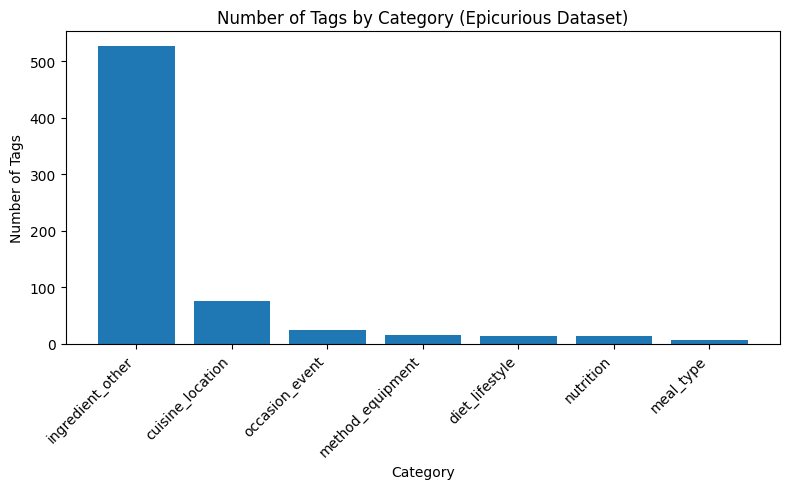

In [105]:
# Get summary counts
summary = tag_map["category"].value_counts().rename_axis("category").reset_index(name="n_tags")

# Plot
plt.figure(figsize=(8,5))
plt.bar(summary["category"], summary["n_tags"])
plt.xlabel("Category")
plt.ylabel("Number of Tags")
plt.title("Number of Tags by Category (Epicurious Dataset)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




*   Keep your nutrition + grocery integration as the main deliverable (MVP).
*   If time allows, layer in “cuisine” and “occasion” metadata. You don’t even need a complex model — simple tag filtering can demonstrate the value.


for example: get vegetarian Mexican recipes with <= 400 calories
User says they’re vegetarian → filter vegetarian == 1.
User wants Mexican cuisine → filter mexico == 1.
User has a calorie limit → filter calories <= X.

then:
filtered = df[
    (df["vegetarian"] == 1) &
    (df["mexico"] == 1) &
    (df["calories"] <= 400)
]



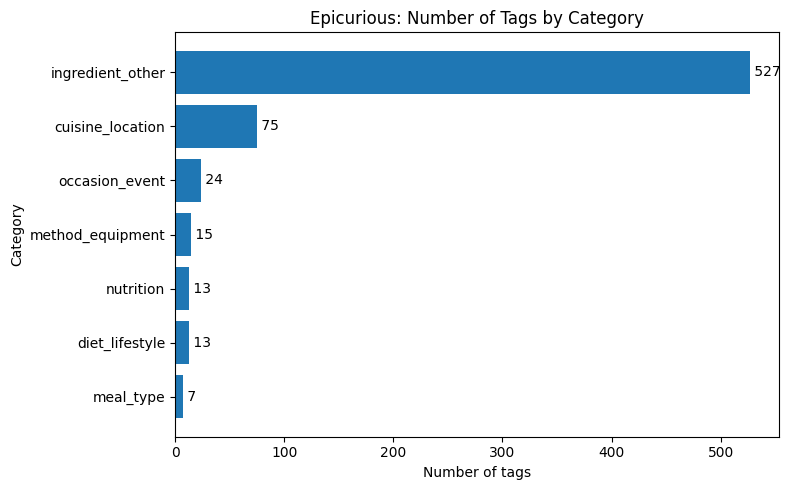

Saved figure to: /content/drive/MyDrive/MIDS_main/DS210/eda_tag_category_counts.png


In [106]:
# Build the summary table
# summary = (
#     tag_map["category"]
#     .value_counts()
#     .rename_axis("category")
#     .reset_index(name="n_tags")
# )

# --- Matplotlib bar chart: sorted, with count labels, saved to Drive ---
# import matplotlib.pyplot as plt

# sort by count ascending for a clean horizontal bar chart
summary_sorted = summary.sort_values("n_tags", ascending=True)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(summary_sorted["category"], summary_sorted["n_tags"])

# labels & title
ax.set_xlabel("Number of tags")
ax.set_ylabel("Category")
ax.set_title("Epicurious: Number of Tags by Category")

# put the counts at the end of each bar
for i, v in enumerate(summary_sorted["n_tags"].tolist()):
    ax.text(v, i, f" {v}", va="center")  # small left padding

plt.tight_layout()
plt.show()

# Adjust path
save_path = "/content/drive/MyDrive/MIDS_main/DS210/eda_tag_category_counts.png"
fig.savefig(save_path, dpi=200)
print("Saved figure to:", save_path)


In [107]:
df[['protein', 'sodium', 'calories', 'title', 'fat', 'rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   protein   14470 non-null  float64
 1   sodium    14501 non-null  float64
 2   calories  14502 non-null  float64
 3   title     18251 non-null  object 
 4   fat       14450 non-null  float64
 5   rating    18251 non-null  float64
dtypes: float64(5), object(1)
memory usage: 855.6+ KB


In [108]:
#  recipe-level tag counts

# tags actually present in the dataframe (safe intersection)
tag_cols_in_df = [t for t in tag_map["tag"] if t in df.columns]

# total tags per recipe
df["n_tags_total"] = df[tag_cols_in_df].sum(axis=1)

# tags per recipe by category
by_cat_counts = {}
for cat, group in tag_map.groupby("category"):
    cols = [t for t in group["tag"] if t in df.columns]
    if cols:
        by_cat_counts[cat] = df[cols].sum(axis=1)

tag_counts = pd.DataFrame(by_cat_counts)
tag_counts["n_tags_total"] = df["n_tags_total"]

# quick look
tag_counts.describe()


,cuisine_location,diet_lifestyle,ingredient_other,meal_type,method_equipment,nutrition,occasion_event,n_tags_total
count,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000
mean,0.045313,2.767684,7.530382,0.445839,0.495151,0.643362,0.388143,12.315873
std,0.226411,3.222362,2.453534,0.604060,0.600836,1.049400,0.779265,5.000142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,12.000000
75%,0.000000,6.000000,9.000000,1.000000,1.000000,1.000000,1.000000,16.000000
max,2.000000,11.000000,23.000000,4.000000,4.000000,9.000000,11.000000,37.000000


In [109]:
# how many recipes have at least one tag in each category
(cat_coverage := (tag_counts.drop(columns=["n_tags_total"]) > 0).mean().sort_values(ascending=False))

,0
ingredient_other,0.999671
diet_lifestyle,0.529450
method_equipment,0.443757
meal_type,0.388198
nutrition,0.370062
occasion_event,0.267218
cuisine_location,0.041313


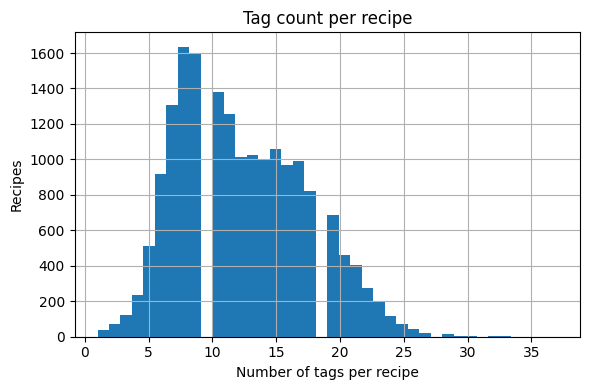

In [110]:
#  distribution of total tags per recipe
plt.figure(figsize=(6,4))
df["n_tags_total"].hist(bins=40)
plt.xlabel("Number of tags per recipe")
plt.ylabel("Recipes")
plt.title("Tag count per recipe")
plt.tight_layout()
plt.show()


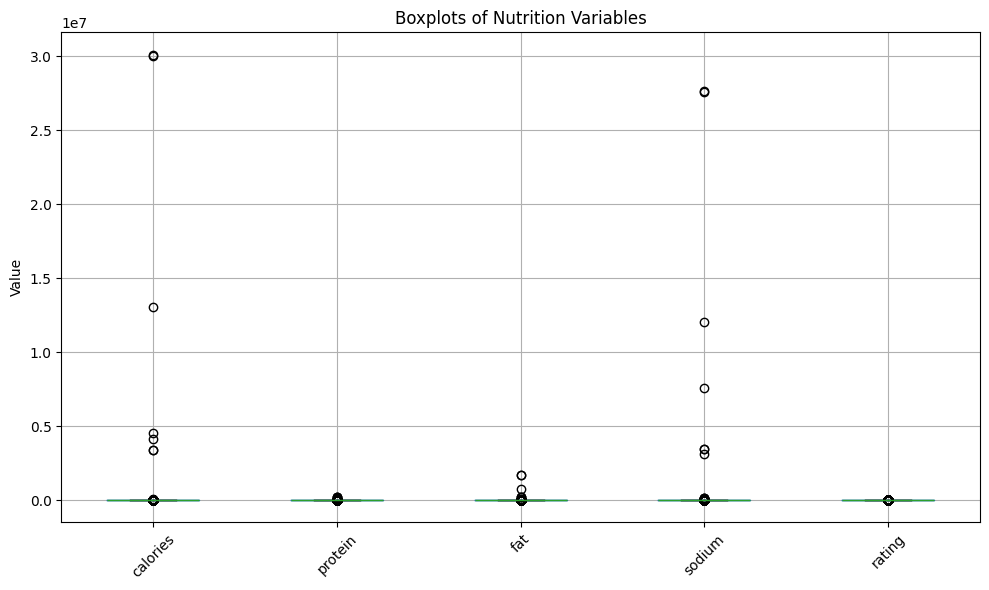

Saved: /content/drive/MyDrive/MIDS_main/DS210/eda_tag_category_counts.png


In [111]:
# --- save folder once ---
save_folder = "/content/drive/MyDrive/MIDS_main/DS210"

num_cols = ["calories", "protein", "fat", "sodium", "rating"]

plt.figure(figsize=(10, 6))
df[num_cols].boxplot()
plt.title("Boxplots of Nutrition Variables")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bar_path = f"{save_folder}/eda_tag_category_counts.png"
fig.savefig(bar_path, dpi=200)
print("Saved:", bar_path)

In [112]:
for col in ["calories", "protein", "fat", "sodium"]:
    print(f"\n{col} summary:")
    print(df[col].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))
    print("Top 5 values:", df[col].nlargest(5).values)



calories summary:
count    1.450200e+04
mean     6.622096e+03
std      3.747819e+05
min      0.000000e+00
50%      3.450000e+02
75%      5.990000e+02
90%      9.579000e+02
95%      1.323900e+03
99%      3.309820e+03
max      3.011122e+07
Name: calories, dtype: float64
Top 5 values: [30111218. 29997918. 13062948.  4518216.  4157357.]

protein summary:
count     14470.000000
mean         92.227920
std        3511.756255
min           0.000000
50%           9.000000
75%          28.000000
90%          53.000000
95%          76.000000
99%         171.000000
max      236489.000000
Name: protein, dtype: float64
Top 5 values: [236489. 200968. 200210. 166471.  87188.]

fat summary:
count    1.445000e+04
mean     3.633945e+02
std      2.135770e+04
min      0.000000e+00
50%      1.800000e+01
75%      3.400000e+01
90%      6.100000e+01
95%      8.600000e+01
99%      2.140000e+02
max      1.722763e+06
Name: fat, dtype: float64
Top 5 values: [1722763. 1716279.  747374.  221495.  186660.]

sodium s

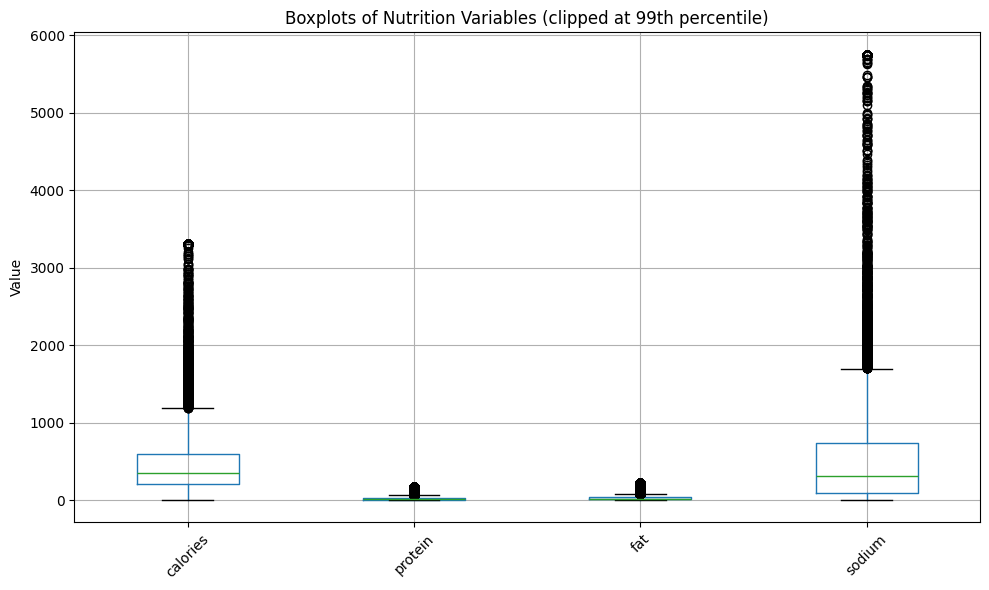

In [113]:

nutri_cols = ["calories", "protein", "fat", "sodium"]

# Clip at 99th percentile
df_clipped = df[nutri_cols].copy()
for col in nutri_cols:
    upper = np.nanpercentile(df[col], 99)
    df_clipped[col] = np.clip(df[col], None, upper)

plt.figure(figsize=(10, 6))
df_clipped.boxplot()
plt.title("Boxplots of Nutrition Variables (clipped at 99th percentile)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


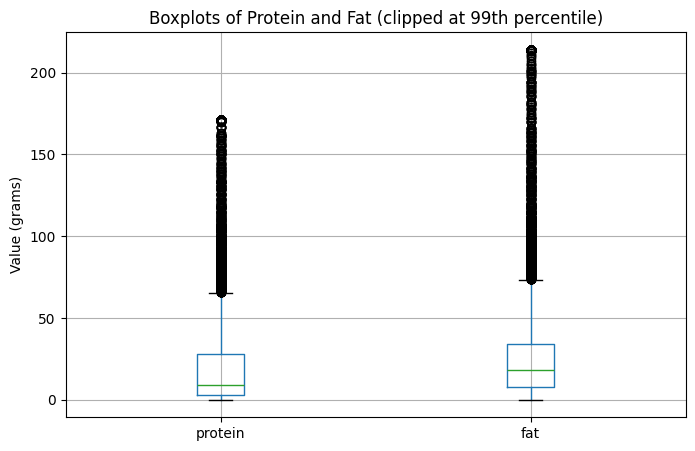

In [114]:
plt.figure(figsize=(8, 5))
df_clipped[["protein", "fat"]].boxplot()
plt.title("Boxplots of Protein and Fat (clipped at 99th percentile)")
plt.ylabel("Value (grams)")
plt.show()


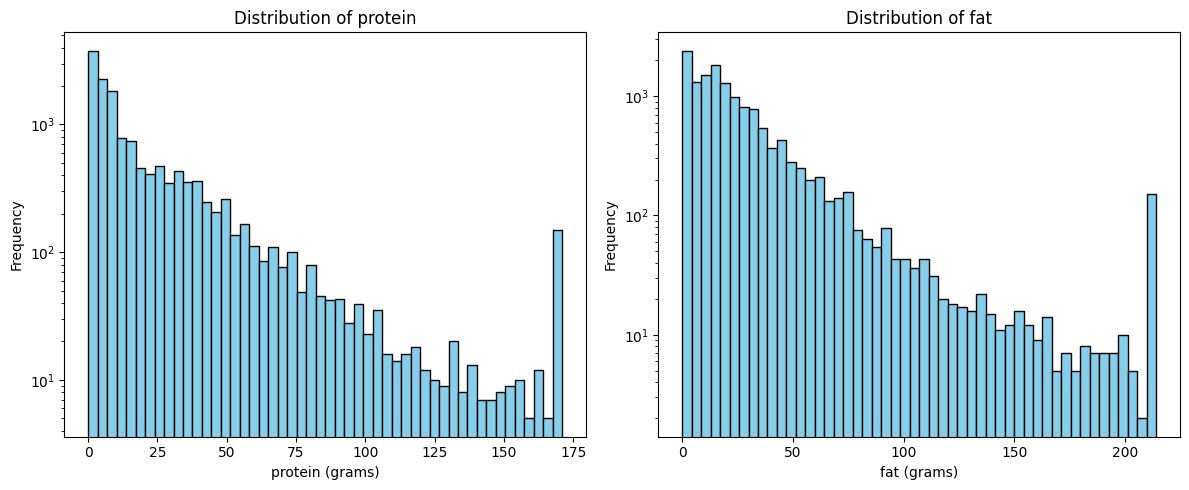

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, col in zip(axes, ["protein", "fat"]):
    ax.hist(df_clipped[col].dropna(), bins=50, color="skyblue", edgecolor="black")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(f"{col} (grams)")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")  # helps with long tails

plt.tight_layout()
plt.show()

# outliers & duplicate titles (not exact copies)

In [116]:
# looking for outliers
df[df['protein']>1000]

df[df['title'].str.contains('Rice Pilaf with Lamb, Carrots, and Raisins', case=False, na=False)] # there are duplicates

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_tags_total
1293,"Rice Pilaf with Lamb, Carrots, and Raisins",5.0,4157357.0,236489.0,221495.0,3134853.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0


In [117]:
# get duplicate titles with a single call
# Option A: value_counts with explicit names
dup_titles = (
    df['title']
      .value_counts()                      # Series: index=title, values=count
      .rename_axis('title')                # name the index
      .reset_index(name='count')           # turn values into 'count' column
      .query('count > 1')                  # keep only duplicates
      .sort_values('count', ascending=False, ignore_index=True)
)

print(dup_titles.head(20))
print(f"Total duplicate recipe titles: {len(dup_titles)}")


                     title  count
0           Chicken Stock      16
1            Pastry Dough      15
2     Turkey Giblet Stock      11
3            Turkey Stock       8
4            Simple Syrup       8
5               French 75       7
6             Salsa Verde       7
7             Pizza Dough       6
8         Vegetable Stock       6
9         Raspberry Sauce       5
10  Root Vegetable Gratin       5
11        Tomatillo Salsa       5
12       White Fish Stock       5
13     Pickled Red Onions       5
14         Tomato Chutney       4
15        Chocolate Glaze       4
16          Avocado Salsa       4
17      Horseradish Cream       4
18  Buttermilk Corn Bread       4
19          Tortilla Soup       4
Total duplicate recipe titles: 364


In [118]:
#  Inspect all rows of a given duplicate title
target = "Pastry Dough"
block = df[df['title'].str.strip().eq(target)]
block


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_tags_total
126,Pastry Dough,5.000,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1072,Pastry Dough,0.000,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
1166,Pastry Dough,4.375,287.0,4.0,19.0,128.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
1240,Pastry Dough,5.000,1405.0,17.0,96.0,597.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2070,Pastry Dough,5.000,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3307,Pastry Dough,5.000,233.0,3.0,16.0,196.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3663,Pastry Dough,5.000,276.0,3.0,19.0,120.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5863,Pastry Dough,5.000,1405.0,17.0,96.0,597.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
7585,Pastry Dough,3.750,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
7735,Pastry Dough,3.750,1405.0,17.0,96.0,597.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [119]:
# EXACT DUPLICATES WERE ADDRESSED 9/21


# # See all truly duplicated rows (identical across all columns)
# dupe_rows = df[df.duplicated(keep=False)].sort_values(['title'])
# dupe_rows.head(20)

# Carbs

In [120]:
# look for likely carb columns
carb_candidates = [c for c in df.columns if any(k in c.lower() for k in [
    "carb", "carbo", "carbohyd", "net carb", "total carb"
])]
print("Carb-ish columns:", carb_candidates)

# peek at types/values if any were found
if carb_candidates:
    display(df[carb_candidates].head())
    print(df[carb_candidates].dtypes)


Carb-ish columns: ['low carb']


,low carb
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


low carb    float64
dtype: object


## Method: Carbohydrate by difference
Yes, if a recipe dataset contains nutrition values for calories, protein, and fat, the total carbohydrate content can be estimated with reasonable accuracy. This is done using a calculation known as "carbohydrate by difference". Method: Carbohydrate by difference This method leverages the fact that total calories come almost entirely from three macronutrients: protein, fat, and carbohydrates. By calculating the calories from the known protein and fat values, you can subtract them from the total calorie count to find the calories from carbohydrates, and then convert that figure to grams. The formula and steps: Recall the caloric values per gram for each macronutrient:Protein: 4 calories per gram.Fat: 9 calories per gram.Carbohydrates: 4 calories per gram.Calculate calories from protein and fat:Calories from Protein = (grams of protein) * 4Calories from Fat = (grams of fat) * 9Find calories from carbohydrates:Calories from Carbs = (Total Calories) - (Calories from Protein) - (Calories from Fat)Convert carbohydrate calories to grams:Grams of Carbs = (Calories from Carbs) / 4 Example calculation Suppose a recipe has the following nutritional information per serving: Total Calories: 300Protein: 20gFat: 15g Here is how to estimate the carbs: Calculate calories from protein and fat:Calories from protein: \(20\text{g}\times 4=80\) caloriesCalories from fat: \(15\text{g}\times 9=135\) caloriesFind calories from carbs:Calories from carbs: \(300-80-135=85\) caloriesConvert carb calories to grams:Grams of carbs: $85 / 4 = 21.25$g Considerations and limitations Rounding and accuracy: Be aware that rounding can affect the final estimate, as nutrition labels often use rounded values. Some analyses may also factor in alcohol, which provides 7 calories per gram.Fiber content: This method estimates total carbohydrates, which includes dietary fiber. *For low-carb diets, where "net carbs" are important, this method may not be specific enough. Net carbs require subtracting fiber from the total carbohydrate count.Ingredient data: A more precise approach is to calculate the nutrition facts by summing the known values of all individual ingredients.* This method, however, is dependent on having complete data for each component of the recipe

https://gym-mikolo.com/blogs/home-gym/how-to-calculate-calories-from-carbohydrates-proteins-and-fats#:~:text=Carbohydrates:%201%20gram%20=%204%20calories,the%20following%20in%20a%20meal:

https://www.ars.usda.gov/ARSUserFiles/80400525/Articles/jfca10_102-114.pdf

In [121]:
# Assumes 4 kcal/g for protein & carbs, 9 kcal/g for fat; ignore alcohol.
# We’ll set negative estimates to NaN and optionally clip for cleaner plots.
nutri_cols = ["calories","protein","fat","sodium"]
assert all(c in df.columns for c in ["calories","protein","fat"]), "Missing one of calories/protein/fat."

# Estimated carbs (g) by energy balance
carbs_est = (df["calories"] - (4*df["protein"] + 9*df["fat"])) / 4.0
carbs_est = carbs_est.mask(carbs_est < 0, np.nan)  # drop impossible negatives

df["carbs_est_g"] = carbs_est
print(df[["calories","protein","fat","carbs_est_g"]].describe(percentiles=[.5,.9,.95,.99]))

           calories        protein           fat   carbs_est_g
count  1.450200e+04   14470.000000  1.445000e+04  1.435000e+04
mean   6.622096e+03      92.227920  3.633945e+02  7.566021e+02
std    3.747819e+05    3511.756255  2.135770e+04  4.342358e+04
min    0.000000e+00       0.000000  0.000000e+00  0.000000e+00
50%    3.450000e+02       9.000000  1.800000e+01  2.900000e+01
90%    9.579000e+02      53.000000  6.100000e+01  7.750000e+01
95%    1.323900e+03      76.000000  8.600000e+01  9.950000e+01
99%    3.309820e+03     171.000000  2.140000e+02  2.245150e+02
max    3.011122e+07  236489.000000  1.722763e+06  3.450620e+06


In [122]:
fiber_col = next((c for c in df.columns if c.lower() == "fiber"), None)
if fiber_col is not None:
    df["net_carbs_est_g"] = (df["carbs_est_g"] - df[fiber_col]).mask(lambda s: s < 0, np.nan)


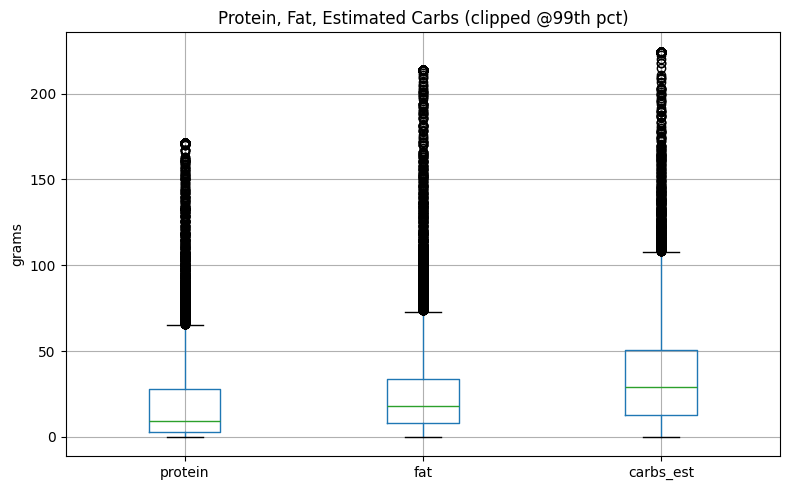

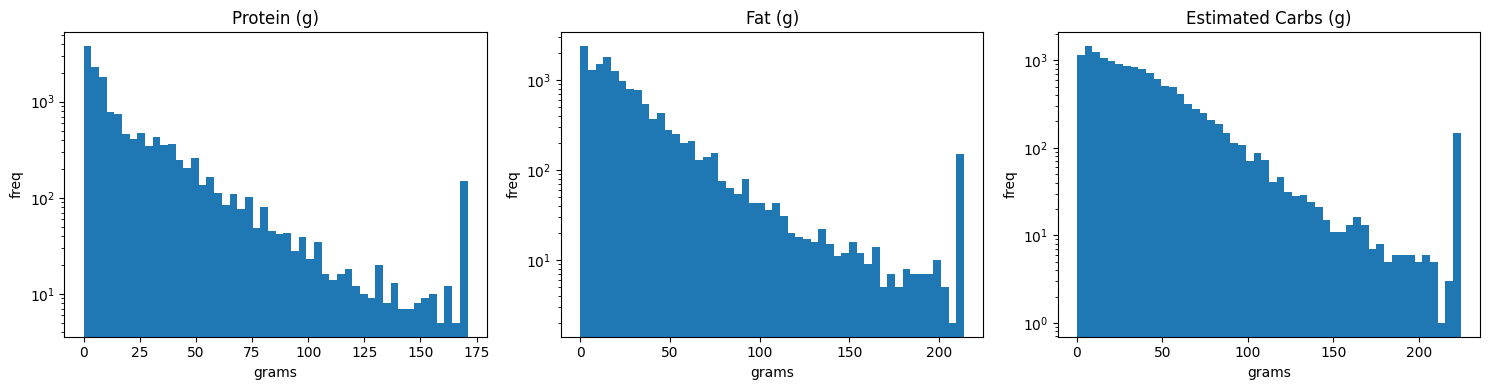

In [123]:
# Add carbs_est_g and clip at 99th percentile for protein/fat/carbs
for col in ["protein","fat","carbs_est_g"]:
    if col in df.columns:
        upper = np.nanpercentile(df[col], 99)
        df[f"{col}_clipped"] = np.clip(df[col], None, upper)

# Boxplots just for protein, fat, carbs
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df[["protein_clipped","fat_clipped","carbs_est_g_clipped"]].boxplot()
plt.title("Protein, Fat, Estimated Carbs (clipped @99th pct)")
plt.ylabel("grams")
plt.xticks([1,2,3], ["protein","fat","carbs_est"])
plt.tight_layout()
plt.show()

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col, label in zip(
    axes,
    ["protein_clipped","fat_clipped","carbs_est_g_clipped"],
    ["Protein (g)","Fat (g)","Estimated Carbs (g)"]
):
    ax.hist(df[col].dropna(), bins=50)
    ax.set_title(label)
    ax.set_xlabel("grams"); ax.set_ylabel("freq")
    ax.set_yscale("log")  # helps with skew
plt.tight_layout()
plt.show()


                  n  median_carbs     p90       p99
low carb                                           
not low carb  14104          29.5  78.000  229.1525
low carb        246           7.0  18.875   59.6875


/tmp/ipython-input-42202282.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["not low carb", "low carb"])


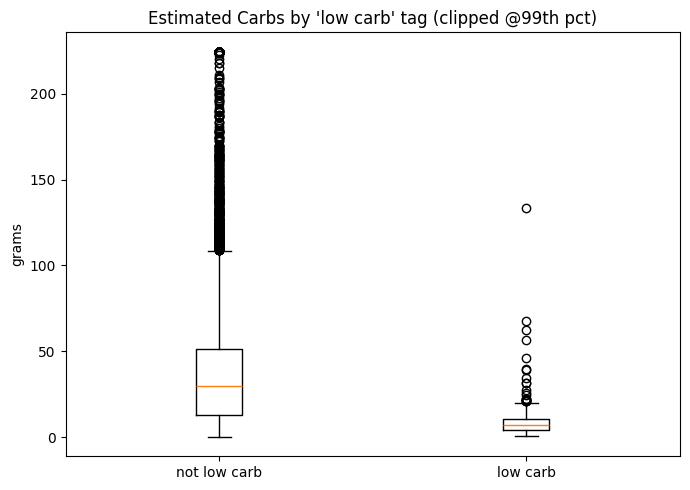

In [124]:
# verify that recipes tagged low carb have lower estimated carbs:

low_carb_col = "low carb" if "low carb" in df.columns else None
if low_carb_col:
    grp = df.groupby(df[low_carb_col].fillna(0)).agg(
        n=("carbs_est_g","count"),
        median_carbs=("carbs_est_g","median"),
        p90=("carbs_est_g", lambda x: np.nanpercentile(x,90)),
        p99=("carbs_est_g", lambda x: np.nanpercentile(x,99))
    )
    grp.index = grp.index.map({0:"not low carb", 1:"low carb"})
    print(grp)

    # Side-by-side boxplot by tag (using clipped carbs)
    data0 = df.loc[df[low_carb_col]==0, "carbs_est_g_clipped"].dropna()
    data1 = df.loc[df[low_carb_col]==1, "carbs_est_g_clipped"].dropna()

    plt.figure(figsize=(7,5))
    plt.boxplot([data0, data1], labels=["not low carb", "low carb"])
    plt.title("Estimated Carbs by 'low carb' tag (clipped @99th pct)")
    plt.ylabel("grams")
    plt.tight_layout()
    plt.show()
else:
    print("No 'low carb' tag column found.")


What “residual” means here

Using the (Atwater) energy factors:

protein: 4 kcal/g

fat: 9 kcal/g

carbs: 4 kcal/g

alcohol (if you have grams of alcohol): 7 kcal/g

Let:

𝑃
P = protein (g),
𝐹
F = fat (g),
𝐶
C = carbs (g),
𝐴
A = alcohol (g), and Cal = calories (kcal).

1) “PF residual” — calories not explained by fat or protein

This is what you just asked about:

residual_PF

=

Cal
−
(
4
𝑃
+
9
𝐹
)
residual_PF=Cal−(4P+9F)

Interpretation:

If you don’t have alcohol grams, then

residual_PF
≈
4
𝐶

(
+
residual_PF≈4C(+ rounding/error
)
).

If you do have alcohol grams
𝐴
A, then

residual_PF
≈
4
𝐶
+
7
𝐴

(
+
residual_PF≈4C+7A(+ rounding/error
)
).

So yes: it’s “the calories that are not fat or protein.” In practice it’s mostly carbs (and alcohol, if present).

2) “Full residual” — after accounting for P, F, and carbs

If you compute carbs from the same equation:

𝐶
est

=

Cal
−
(
4
𝑃
+
9
𝐹

[
+
7
𝐴
]
)
4
,
C
est
	​

=
4
Cal−(4P+9F[+7A])
	​

,

then a full residual

Cal

−

(
4
𝑃
+
9
𝐹
+
4
𝐶
est

[
+
7
𝐴
]
)
Cal−(4P+9F+4C
est
	​

[+7A])

will be exactly 0 by construction (up to floating-point rounding). That’s why you saw all zeros earlier — we used
𝐶
est
C
est
	​

 derived from the same identity.

What to compute for diagnostics

Use residual_PF to see “calories not from protein or fat.”
This is meaningful even when you estimate carbs later.

Optionally, if you have numeric alcohol grams, compute

residual_PFA
=
Cal
−
(
4
𝑃
+
9
𝐹
+
7
𝐴
)
residual_PFA=Cal−(4P+9F+7A)
which isolates 4·carbs (+ noise).

In [125]:
# Detect alc related columns
# Two things are happening:

# Residual = 0 is expected because we defined carbs_est_g from the same energy equation we used to compute the residual. So it cancels out algebraically → not a diagnostic.

# The column alcoholic you “auto-picked” is a 0/1 tag, not grams. Because it’s float (0.0/1.0), our earlier picker treated it as numeric grams and plugged it into 7 * df['alcoholic'] — wrong.

# helper: is a series binary 0/1 (even if float/bool/strings)?
def is_binary_series(s: pd.Series) -> bool:
    s = s.dropna()
    if s.empty:
        return False
    vals = pd.unique(s)
    try:
        # normalize to ints when possible
        norm = set(int(v) if str(v).strip() in {"0","1"} or isinstance(v, (np.integer, np.bool_, bool, int, float)) and v in (0,1) else v
                   for v in vals)
    except Exception:
        return False
    return norm.issubset({0,1})

# find alcohol *grams* columns (NOT tags)
raw_alc_candidates = [c for c in df.columns if re.search(r"(alcohol|ethanol)", c, flags=re.I)]
alc_num_col = None
for c in raw_alc_candidates:
    if pd.api.types.is_numeric_dtype(df[c]) and not is_binary_series(df[c]):
        alc_num_col = c
        break
print("Alcohol grams column detected:", alc_num_col)  # likely None in epi_r.csv

# compute carbs by energy balance (Atwater)
assert all(c in df.columns for c in ["calories","protein","fat"])
if alc_num_col:
    carbs_est = (df["calories"] - (4*df["protein"] + 9*df["fat"] + 7*df[alc_num_col])) / 4.0
else:
    carbs_est = (df["calories"] - (4*df["protein"] + 9*df["fat"])) / 4.0

# drop impossible negatives
df["carbs_est_g"] = carbs_est.mask(carbs_est < 0, np.nan)

# sanity check that's independent of carbs_est_g:
# compare calories vs (4*P + 9*F) only (ignores carbs & alcohol)
df["calories_minus_PF"] = df["calories"] - (4*df["protein"] + 9*df["fat"])
print(df[["calories","protein","fat","calories_minus_PF"]]
      .describe(percentiles=[.5,.9,.95,.99]))



Alcohol grams column detected: None
           calories        protein           fat  calories_minus_PF
count  1.450200e+04   14470.000000  1.445000e+04       1.444700e+04
mean   6.622096e+03      92.227920  3.633945e+02       3.006064e+03
std    3.747819e+05    3511.756255  2.135770e+04       1.731104e+05
min    0.000000e+00       0.000000  0.000000e+00      -5.700000e+01
50%    3.450000e+02       9.000000  1.800000e+01       1.150000e+02
90%    9.579000e+02      53.000000  6.100000e+01       3.100000e+02
95%    1.323900e+03      76.000000  8.600000e+01       3.980000e+02
99%    3.309820e+03     171.000000  2.140000e+02       8.922400e+02
max    3.011122e+07  236489.000000  1.722763e+06       1.380248e+07


In [126]:
#  compute carbs estimate (including alcohol)
# How to use the alcoholic tag properly

# Keep it only for segmentation, not as grams:

if "alcoholic" in df.columns:
    grp = df.groupby(df["alcoholic"].fillna(0)).agg(
        n=("carbs_est_g","count"),
        median_carbs=("carbs_est_g","median"),
        p90=("carbs_est_g", lambda x: np.nanpercentile(x,90)),
        p99=("carbs_est_g", lambda x: np.nanpercentile(x,99)),
    )
    grp.index = grp.index.map({0:"non-alcoholic", 1:"alcoholic"})
    print(grp)


                   n  median_carbs    p90     p99
alcoholic                                        
non-alcoholic  13769         27.75  77.75  229.41
alcoholic        581         45.00  73.00  166.90


What to compute for diagnostics

Use residual_PF to see “calories not from protein or fat.”
This is meaningful even when you estimate carbs later.

Optionally, if you have numeric alcohol grams, compute

residual_PFA
=
Cal
−
(
4
𝑃
+
9
𝐹
+
7
𝐴
)
residual_PFA=Cal−(4P+9F+7A)


which isolates 4·carbs (+ noise).

In [127]:
# Residual calories sanity check
# If alcohol grams are missing,
# ignoring alcohol will underestimate carbs in alcoholic recipes. This residual shows how well the energy equation balances.

# Calories not from protein or fat (≈ carbs + alcohol + rounding)
df["residual_PF"] = df["calories"] - (4*df["protein"] + 9*df["fat"])

# If you had alcohol grams in, say, df["alcohol_g"], use:
# df["residual_PFA"] = df["calories"] - (4*df["protein"] + 9*df["fat"] + 7*df["alcohol_g"])

# Quick look
df[["calories","protein","fat","residual_PF"]].describe(percentiles=[.5,.9,.95,.99])

"""
Sanity checks you can do

Negative residual_PF → inconsistent row (P4 + F9 > calories). We already mask negative carbs estimates; you can also flag these rows.

Very large residual_PF → likely a bad calorie or macro entry.
"""



'\nSanity checks you can do\n\nNegative residual_PF → inconsistent row (P4 + F9 > calories). We already mask negative carbs estimates; you can also flag these rows.\n\nVery large residual_PF → likely a bad calorie or macro entry.\n'

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Columns: 687 entries, title to residual_PF
dtypes: float64(686), object(1)
memory usage: 95.7+ MB


In [129]:
# titles = df['title'].dropna().unique()
# [m for m in titles if "Rice Pilaf" in m]


In [130]:
# move to outlier section

def iqr_outlier_split(
    df: pd.DataFrame,
    cols: list[str] | None = None,
    factor: float = 2,
    how: str = "any",  # "any" or "all"
):
    """
    Split df into outliers and clean sets using Tukey fences per selected column.
    Returns: outliers_df, clean_df, bounds_df
    """
    # choose columns
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # compute per-column bounds
    stats = {}
    for c in cols:
        s = df[c]
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        if pd.isna(iqr) or iqr == 0:
            lower, upper = -np.inf, np.inf
        else:
            lower = q1 - factor * iqr
            upper = q3 + factor * iqr
        stats[c] = {"Q1": q1, "Q3": q3, "IQR": iqr, "lower": lower, "upper": upper}

    bounds_df = pd.DataFrame(stats).T

    # build per-column masks
    mask_df = pd.DataFrame(index=df.index)
    for c in cols:
        lo, hi = bounds_df.loc[c, ["lower", "upper"]]
        mask_df[c] = (df[c] < lo) | (df[c] > hi)

    # combine masks
    if how == "any":
        row_mask = mask_df.any(axis=1)
    elif how == "all":
        row_mask = mask_df.all(axis=1)
    else:
        raise ValueError("how must be 'any' or 'all'")

    outliers_df = df.loc[row_mask].copy()
    if not outliers_df.empty:
        outliers_df["outlier_cols"] = (
            mask_df.loc[row_mask]
                   .apply(lambda r: [c for c, v in r.items() if bool(v)], axis=1)
        )

    clean_df = df.loc[~row_mask].copy()

    return outliers_df, clean_df, bounds_df

In [131]:
# move to outlier section
cols_to_check = ["calories", "protein", "fat", "sodium", "rating"]
outliers_df, clean_df, bounds_df = iqr_outlier_split(df, cols=cols_to_check, factor=2.0, how="any")

In [132]:
# move to outlier section
print("shape:", outliers_df.shape)
outliers_df[cols_to_check].describe()

shape: (3312, 688)


,calories,protein,fat,sodium,rating
count,2.773000e+03,2755.000000,2.742000e+03,2.773000e+03,3312.000000
mean,3.298772e+04,419.673684,1.824202e+03,3.260665e+04,1.891229
std,8.566959e+05,8041.060246,4.900956e+04,7.963425e+05,2.047026
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.040000e+02,3.000000,6.000000e+00,9.000000e+01,0.000000
50%,5.970000e+02,23.000000,3.000000e+01,6.270000e+02,0.000000
75%,1.356000e+03,78.000000,8.800000e+01,2.116000e+03,4.375000
max,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,5.000000


In [133]:
# move to outlier section
outliers_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,snack week,turkey,n_tags_total,carbs_est_g,protein_clipped,fat_clipped,carbs_est_g_clipped,calories_minus_PF,residual_PF,outlier_cols
16,Sweet Buttermilk Spoon Breads,1.875,146.0,4.0,5.0,160.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,21.25,4.0,5.0,21.25,85.0,85.0,[rating]
25,Garlic Baguette Crumbs,0.000,95.0,1.0,7.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,7.00,1.0,7.0,7.00,28.0,28.0,[rating]
36,Pastry Twists with Spiced Sugar-Honey Glaze,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,[rating]
42,Honey Rye,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,[rating]
53,Pancetta Roast Chicken with Walnut Stuffing,5.000,1203.0,89.0,87.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,16.00,89.0,87.0,16.00,64.0,64.0,"[protein, fat]"


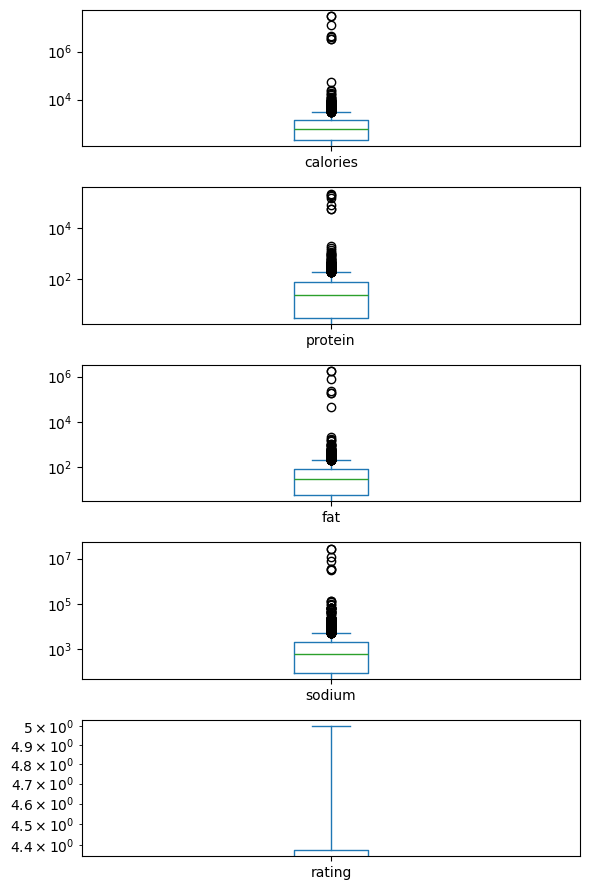

In [134]:
# move to outlier section
use_cols = ["calories", "protein", "fat", "sodium", "rating"]

axes = outliers_df[use_cols].plot.box(
    subplots=True,
    layout=(len(use_cols), 1),   # one column per row
    figsize=(6, 1.8 * len(use_cols)),
    sharey=False,
    logy=True                    # log scale helps with skew
)
plt.tight_layout()
plt.show()

In [135]:
# move to outlier section

# 1) rows that are outliers in CALORIES specifically (using your bounds_df)
lo, hi = bounds_df.loc["calories", ["lower", "upper"]]
cal_mask = (df["calories"] < lo) | (df["calories"] > hi)
cal_out = df.loc[cal_mask, "calories"].dropna()

print(cal_out.describe(percentiles=[.5,.9,.95,.99]))

count    6.670000e+02
mean     1.355628e+05
std      1.743804e+06
min      1.388000e+03
50%      1.935000e+03
90%      5.210200e+03
95%      6.975900e+03
99%      1.177708e+06
max      3.011122e+07
Name: calories, dtype: float64


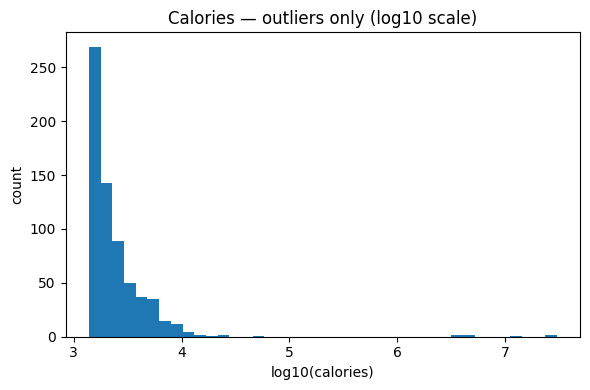

In [136]:
# move to outlier section

# option 2
pos = cal_out[cal_out > 0]  # log needs positive
plt.figure(figsize=(6,4))
plt.hist(np.log10(pos), bins=40)
plt.title("Calories — outliers only (log10 scale)")
plt.xlabel("log10(calories)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [137]:
# move to outlier section

# tmp as a new dataset
# De-duplicate by title with a smart tie-breaker (keep “best” row)

tmp = df.copy()
# how many NaNs across key nutrition fields
nutri = ['calories','protein','fat','sodium']
tmp['nutri_n_missing'] = tmp[nutri].isna().sum(axis=1)

# sort so the best row comes first within each title
tmp = tmp.sort_values(
    by=['title', 'rating', 'nutri_n_missing'],
    # by=['title', 'nutri_n_missing', 'rating'],
    ascending=[True, False, True]
)

# drop duplicates by title, keep the first (best) row
df_deduped = tmp.drop_duplicates(subset=['title'], keep='first').drop(columns=['nutri_n_missing']).reset_index(drop=True)

print("Original rows:", len(df))
print("After de-dup by title:", len(df_deduped))

# If you’d rather keep the row with most complete nutrition regardless of rating, flip the sort keys accordingly.

Original rows: 18251
After de-dup by title: 17736


# Recipes in JSON

In [138]:
!pip -q install ijson

import ijson, itertools, json

In [139]:
#! cat /content/drive/MyDrive/MIDS_main/DS210/Data/full_format_recipes.json

In [140]:
json_path = "/content/drive/MyDrive/MIDS_main/DS210/Data/full_format_recipes.json"
print("Size (MB):", round(os.path.getsize(json_path)/1024**2, 2))

# Stream the top N items without loading the full file
N = 3
with open(json_path, "rb") as f:
    items = ijson.items(f, "item")   # 'item' = each element of the top-level list
    sample = list(itertools.islice(items, N))

print(f"Loaded {len(sample)} sample recipes")
for i, r in enumerate(sample, 1):
    print(f"\n--- Recipe {i} keys:", list(r.keys()))
    print("title:", r.get("title"))
    print("rating:", r.get("rating"))
    print("n_ingredients:", len(r.get("ingredients", [])))
    print("n_directions:", len(r.get("directions", [])))

Size (MB): 33.62
Loaded 3 sample recipes

--- Recipe 1 keys: ['directions', 'fat', 'date', 'categories', 'calories', 'desc', 'protein', 'rating', 'title', 'ingredients', 'sodium']
title: Lentil, Apple, and Turkey Wrap 
rating: 2.5
n_ingredients: 15
n_directions: 3

--- Recipe 2 keys: ['directions', 'fat', 'date', 'categories', 'calories', 'desc', 'protein', 'rating', 'title', 'ingredients', 'sodium']
title: Boudin Blanc Terrine with Red Onion Confit 
rating: 4.375
n_ingredients: 28
n_directions: 5

--- Recipe 3 keys: ['directions', 'fat', 'date', 'categories', 'calories', 'desc', 'protein', 'rating', 'title', 'ingredients', 'sodium']
title: Potato and Fennel Soup Hodge 
rating: 3.75
n_ingredients: 6
n_directions: 2


In [144]:
# === Rebuild CSV, JSON-slim, de-dup JSON by title_norm, then MERGE ===
# ---- Paths ----
from pathlib import Path

csv_path  = "/content/drive/MyDrive/MIDS_main/DS210/Data/epi_r.csv"
json_path = "/content/drive/MyDrive/MIDS_main/DS210/Data/full_format_recipes.json"
parq_path = Path("/content/drive/MyDrive/MIDS_main/DS210/Data/epicurious_full_slim.parquet")

def norm_title(s):
    if not isinstance(s, str): return None
    return re.sub(r"\s+", " ", s.strip().lower())

# 1) Load CSV and add normalized title
df_csv = pd.read_csv(csv_path)
df_csv["title_norm"] = df_csv["title"].astype(str).str.lower().str.replace(r"\s+"," ",regex=True).str.strip()

# 2) Load (or build) slim JSON table
if parq_path.exists():
    df_full = pd.read_parquet(parq_path)
else:
    # Build slim table from JSON (streaming)
    try:
        import ijson
    except ImportError:
        import sys
        !pip -q install ijson
        import ijson

    rows = []
    with open(json_path, "rb") as f:
        for rec in ijson.items(f, "item"):
            rows.append({
                "title": rec.get("title"),
                "title_norm": norm_title(rec.get("title")),
                "rating_json": rec.get("rating"),
                "date": rec.get("date"),
                "desc": rec.get("desc"),
                "ingredients": rec.get("ingredients", []),
                "directions": rec.get("directions", []),
                "categories_json": rec.get("categories", []),
                "calories_json": rec.get("calories"),
                "protein_json": rec.get("protein"),
                "fat_json": rec.get("fat"),
                "sodium_json": rec.get("sodium"),
            })
    df_full = pd.DataFrame(rows)
    df_full.to_parquet(parq_path, index=False)

# 3) De-duplicate JSON by title_norm (pick best record per title)
sc = df_full.assign(
    _n_missing = df_full[["calories_json","protein_json","fat_json","sodium_json","rating_json"]].isna().sum(axis=1),
    _n_ing = df_full["ingredients"].apply(lambda x: len(x) if isinstance(x, list) else 0),
    _n_dir = df_full["directions"].apply(lambda x: len(x) if isinstance(x, list) else 0),
    _rating = pd.to_numeric(df_full["rating_json"], errors="coerce").fillna(-1)
).sort_values(
    ["title_norm","_n_missing","_n_ing","_n_dir","_rating"],
    ascending=[True, True, False, False, False]
)
df_full_dedup = sc.drop_duplicates(subset=["title_norm"], keep="first").drop(columns=["_n_missing","_n_ing","_n_dir","_rating"])

# Sanity: right keys must be unique
assert not df_full_dedup["title_norm"].duplicated().any(), "Right-side title_norm still not unique"

# 4) Merge (many CSV rows to one JSON row is allowed)
merged = df_csv.merge(
    df_full_dedup.drop(columns=["title"]),   # keep CSV title
    on="title_norm",
    how="left",
    validate="m:1",
    suffixes=("", "_json")
)

print("Merged rows:", len(merged))
print("Match rate (has ingredients):", merged["ingredients"].notna().mean())

# 5) Build unified *_use numeric columns (optional but handy)
for c in ["calories","protein","fat","sodium","rating"]:
    left  = pd.to_numeric(merged.get(c), errors="coerce")
    right = pd.to_numeric(merged.get(f"{c}_json"), errors="coerce")
    merged[f"{c}_use"] = left.fillna(right)

# 6) Optionally drop rows with ALL 4 macros missing
nutri_use = [f"{c}_use" for c in ["calories","protein","fat","sodium"]]
mask_all4_missing = merged[nutri_use].isna().all(axis=1)
print("Rows with all 4 macros missing:", int(mask_all4_missing.sum()))
merged_clean = merged.loc[~mask_all4_missing].copy()



Merged rows: 20052
Match rate (has ingredients): 1.0
Rows with all 4 macros missing: 3989


In [145]:
# QC on the merge

# nothing missing for these?
for k in ["ingredients", "directions", "categories_json"]:
    print(k, merged[k].isna().sum())

# how many ingredients / directions per recipe?
merged["n_ingredients"] = merged["ingredients"].apply(len)
merged["n_directions"]  = merged["directions"].apply(len)
print(merged[["n_ingredients","n_directions"]].describe())


ingredients 0
directions 0
categories_json 0
       n_ingredients  n_directions
count   20052.000000  20052.000000
mean        9.901207      3.448384
std         4.599068      2.320785
min         0.000000      0.000000
25%         7.000000      2.000000
50%         9.000000      3.000000
75%        12.000000      5.000000
max        51.000000     24.000000


In [146]:
# ijson uses Decimal for numeric accuracy by default.

# Pandas operations require compatible dtypes; mixing Decimal with float breaks arithmetic.

num = ["calories","protein","fat","sodium"]
json_num = [f"{c}_json" for c in num]

# Coerce both CSV and JSON numeric columns to float
for col in num + json_num + ["rating_json"]:
    if col in merged.columns:
        merged[col] = pd.to_numeric(merged[col], errors="coerce").astype(float)

# Now run the comparison
for c in num:
    both = merged[[c, f"{c}_json"]].dropna()
    a = both[c].astype(float)
    b = both[f"{c}_json"].astype(float)

    diff = b - a
    mism = ~np.isclose(b, a, rtol=0, atol=1e-6)  # tweak atol if you want rounding tolerance

    print(
        f"\n{c}: n_compared={len(both)}, "
        f"mismatch%={mism.mean()*100:.1f}, "
        f"abs_median={np.median(np.abs(diff)):.2f}, "
        f"p95_abs={np.percentile(np.abs(diff),95):.2f}"
    )



calories: n_compared=15935, mismatch%=3.0, abs_median=0.00, p95_abs=0.00

protein: n_compared=15890, mismatch%=2.2, abs_median=0.00, p95_abs=0.00

fat: n_compared=15869, mismatch%=2.3, abs_median=0.00, p95_abs=0.00

sodium: n_compared=15933, mismatch%=2.9, abs_median=0.00, p95_abs=0.00


In [147]:
import math
from pandas.api.types import is_list_like

def _fmt_num(x, unit=""):
    if pd.isna(x):
        return "-"
    try:
        xf = float(x)
        s = str(int(xf)) if xf.is_integer() else f"{xf:.2f}"
        return f"{s}{unit}"
    except Exception:
        return f"{x}{unit}" if x is not None else "-"

def _coalesce(*vals):
    """Return the first value that is not None/NaN (without triggering array truthiness)."""
    for v in vals:
        if v is None:
            continue
        # treat float nan as missing
        try:
            if isinstance(v, float) and math.isnan(v):
                continue
        except Exception:
            pass
        return v
    return None

def _as_list(x):
    """Safely convert ingredient/direction/categories fields to a Python list."""
    if x is None:
        return []
    # NaN
    if isinstance(x, float) and math.isnan(x):
        return []
    # Already list/tuple
    if isinstance(x, (list, tuple)):
        return list(x)
    # NumPy / pandas
    if isinstance(x, (np.ndarray, pd.Series)):
        return list(x.tolist())
    # Strings -> single-item list
    if isinstance(x, (str, bytes)):
        return [x]
    # Generic iterable (avoid dict which would give keys)
    if hasattr(x, "__iter__") and not isinstance(x, dict):
        try:
            return list(x)
        except Exception:
            pass
    return []

def print_recipe(rec: pd.Series):
    title = rec.get("title")
    # prefer unified *_use if you created them; else fall back
    rating = _coalesce(rec.get("rating_use"), rec.get("rating"), rec.get("rating_json"))
    cal    = _coalesce(rec.get("calories_use"), rec.get("calories"), rec.get("calories_json"))
    prot   = _coalesce(rec.get("protein_use"),  rec.get("protein"),  rec.get("protein_json"))
    fat    = _coalesce(rec.get("fat_use"),      rec.get("fat"),      rec.get("fat_json"))
    sod    = _coalesce(rec.get("sodium_use"),   rec.get("sodium"),   rec.get("sodium_json"))

    print(f"🍽️  {title}")
    print(f"Rating: {_fmt_num(rating)} | Calories: {_fmt_num(cal)} | "
          f"P: {_fmt_num(prot,'g')} F: {_fmt_num(fat,'g')} Na: {_fmt_num(sod,'mg')}")

    ings = _as_list(rec.get("ingredients"))
    dirs = _as_list(rec.get("directions"))
    cats = _as_list(_coalesce(rec.get("categories_json"), rec.get("categories")))

    print("\nIngredients:")
    for i in ings:
        print(f" • {i}")

    print("\nDirections:")
    for i, step in enumerate(dirs, 1):
        print(f" {i}. {step}")

    if cats:
        print("\nTags:", ", ".join(map(str, cats)))
    print("\n" + "-"*80 + "\n")

def show_recipes(df: pd.DataFrame,
                 rows: int = 3,
                 query: str | None = None,
                 sort_by: str | None = None,
                 ascending: bool = False,
                 random: bool = False,
                 only_complete_macros: bool = False,
                 only_missing_macros: bool = False):
    nutri_use = [c for c in ["calories_use","protein_use","fat_use","sodium_use"] if c in df.columns]
    data = df

    if only_complete_macros and nutri_use:
        data = data.loc[~data[nutri_use].isna().any(axis=1)]
    if only_missing_macros and nutri_use:
        data = data.loc[data[nutri_use].isna().any(axis=1)]
    if query:
        data = data[data["title"].str.contains(query, case=False, na=False)]
    if sort_by:
        data = data.sort_values(sort_by, ascending=ascending)

    data = data.sample(min(rows, len(data)), random_state=42) if random else data.head(rows)
    for _, rec in data.iterrows():
        print_recipe(rec)



In [148]:
# 1) Show 3 random recipes
show_recipes(merged, rows=3, random=True)

# 2) Show top 5 by rating (CSV rating if present; else rating_json)
merged["_rating_use"] = merged["rating"].fillna(merged.get("rating_json"))
show_recipes(merged, rows=5, sort_by="_rating_use", ascending=False)

# 3) Search by title substring
show_recipes(merged, rows=3, query="chicken")

# 4) Show an exact title match
show_recipes(merged[merged["title"]=="Rice Pilaf with Lamb, Carrots, and Raisins"], rows=1)


🍽️  Bubbe's Chicken Soup 
Rating: 4.38 | Calories: 613 | P: 38g F: 26g Na: 1055mg

Ingredients:
 • 1 (3 1/2 pound) chicken, preferably kosher, cut into 8 pieces
 • 2 medium yellow onions, peeled and cut in half
 • 5 medium carrots, peeled and cut in 2-inch pieces
 • 5 medium celery stalks, with leaves, cut in 2-inch pieces
 • 5 medium parsnips, peeled and cut in 2-inch pieces
 • 1 medium sweet potato, peeled and cut in half
 • 1 bunch fresh dill
 • 4 1/2 teaspoons kosher salt
 • 1 teaspoon freshly ground black pepper
 • 1 pound dried wide egg noodles*
 • 4 medium carrots, peeled and cut in 1/4-inch pieces
 • 2 medium celery stalks, cut in 1/4-inch pieces
 • *White rice can be substituted.

Directions:
 1. In 12-quart heavy pot, combine chicken and enough water to cover, about 8 quarts. Bring to boil, skimming froth. Add onions, carrots, celery, parsnips, sweet potato, and dill, and simmer, partially covered, 3 hours.
 2. Pour stock through fine-mesh strainer into large bowl, reserving 

In [149]:
# ==== Fixed: unified macros + recipe viewer ====

assert 'merged' in globals(), "we need the `merged` DataFrame in memory first."

# -- Ensure unified numeric columns exist on any frame passed in
def _ensure_unified_cols(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for c in ["calories","protein","fat","sodium"]:
        if f"{c}_use" not in df.columns:
            left  = pd.to_numeric(df.get(c), errors="coerce")                # CSV
            right = pd.to_numeric(df.get(f"{c}_json"), errors="coerce")      # JSON
            df[f"{c}_use"] = left.fillna(right)
    if "rating_use" not in df.columns:
        df["rating_use"] = (
            pd.to_numeric(df.get("rating"), errors="coerce")
              .fillna(pd.to_numeric(df.get("rating_json"), errors="coerce"))
        )
    return df

merged = _ensure_unified_cols(merged)

# -- Drop rows with ALL 4 macros missing (build merged_clean)
nutri_use = [f"{c}_use" for c in ["calories","protein","fat","sodium"]]
mask_all4_missing = merged[nutri_use].isna().all(axis=1)
print("Rows with all 4 macros missing:", int(mask_all4_missing.sum()))
merged_clean = merged.loc[~mask_all4_missing].copy()

# ---------- Viewer helpers ----------
def _fmt_num(x, unit=""):
    if pd.isna(x): return "-"
    try:
        xf = float(x)
        s = str(int(xf)) if xf.is_integer() else f"{xf:.2f}"
        return f"{s}{unit}"
    except Exception:
        return f"{x}{unit}" if x is not None else "-"

def _coalesce(*vals):
    for v in vals:
        if v is None:
            continue
        if isinstance(v, float) and math.isnan(v):
            continue
        return v
    return None

def _as_list(x):
    if x is None: return []
    if isinstance(x, float) and math.isnan(x): return []
    if isinstance(x, (list, tuple)): return list(x)
    if isinstance(x, (np.ndarray, pd.Series)): return list(x.tolist())
    if isinstance(x, (str, bytes)): return [x]
    if hasattr(x, "__iter__") and not isinstance(x, dict):
        try: return list(x)
        except Exception: return []
    return []

def print_recipe(rec: pd.Series):
    title = rec.get("title")
    rating = _coalesce(rec.get("rating_use"), rec.get("rating"), rec.get("rating_json"))
    cal    = _coalesce(rec.get("calories_use"), rec.get("calories"), rec.get("calories_json"))
    prot   = _coalesce(rec.get("protein_use"),  rec.get("protein"),  rec.get("protein_json"))
    fat    = _coalesce(rec.get("fat_use"),      rec.get("fat"),      rec.get("fat_json"))
    sod    = _coalesce(rec.get("sodium_use"),   rec.get("sodium"),   rec.get("sodium_json"))

    print(f"🍽️  {title}")
    print(f"Rating: {_fmt_num(rating)} | Calories: {_fmt_num(cal)} | "
          f"P: {_fmt_num(prot,'g')} F: {_fmt_num(fat,'g')} Na: {_fmt_num(sod,'mg')}")

    ings = _as_list(rec.get("ingredients"))
    dirs = _as_list(rec.get("directions"))
    cats = _as_list(_coalesce(rec.get("categories_json"), rec.get("categories")))

    print("\nIngredients:")
    for i in ings: print(f" • {i}")
    print("\nDirections:")
    for i, step in enumerate(dirs, 1): print(f" {i}. {step}")
    if cats: print("\nTags:", ", ".join(map(str, cats)))
    print("\n" + "-"*80 + "\n")

def show_recipes(df: pd.DataFrame,
                 rows: int = 3,
                 query: str | None = None,
                 sort_by: str | None = None,
                 ascending: bool = False,
                 random: bool = False,
                 only_complete_macros: bool = False,
                 only_missing_macros: bool = False):
    # Make sure unified cols exist even if df is a slice
    df = _ensure_unified_cols(df)
    nu_cols = [c for c in ["calories_use","protein_use","fat_use","sodium_use"] if c in df.columns]

    data = df
    if only_complete_macros and nu_cols:
        data = data.loc[~data[nu_cols].isna().any(axis=1)]
    if only_missing_macros and nu_cols:
        data = data.loc[data[nu_cols].isna().any(axis=1)]
    if query:
        data = data[data["title"].str.contains(query, case=False, na=False)]
    if sort_by:
        if sort_by not in data.columns:
            raise KeyError(f"Column '{sort_by}' not found.")
        data = data.sort_values(sort_by, ascending=ascending)

    if len(data) == 0:
        print("(No rows match your filters.)")
        return

    data = data.sample(min(rows, len(data)), random_state=42) if random else data.head(rows)
    for _, rec in data.iterrows():
        print_recipe(rec)
# ==== end block ====


Rows with all 4 macros missing: 3989


call show_recipes(merged_clean, rows=3, random=True) or any of the examples below

If you want to include the rows with all four macros missing, use 'merged' instead of 'merged_clean'.

In [150]:
# Show 3 random recipes (using merged_clean which excludes all-4-missing)
show_recipes(merged_clean, rows=3, random=True)


🍽️  Turkey Meatballs With Cranberry Sauce 
Rating: 3.75 | Calories: 67 | P: 4g F: 3g Na: 128mg

Ingredients:
 • 1 tablespoon vegetable oil
 • 1 pound ground pork
 • 1 pound ground turkey
 • 2 large eggs
 • 2 garlic cloves, finely chopped
 • 1 cup fresh breadcrumbs
 • 2/3 cup whole milk
 • 1/2 teaspoon crushed fennel seeds
 • 4 teaspoons finely chopped sage, plus whole leaves for garnish (optional)
 • 2 1/2 teaspoons kosher salt, divided
 • 3/4 teaspoon freshly ground black pepper, divided
 • 1 (14-ounce) can jellied cranberry sauce
 • 2 tablespoons fresh orange juice
 • 2 tablespoons dark brown sugar
 • 1 tablespoon finely chopped fresh ginger

Directions:
 1. Preheat oven to 450°F. Coat a rimmed baking sheet with oil.
 2. Using your hands, mix pork, turkey, eggs, garlic, breadcrumbs, milk, fennel, 4 tsp. chopped sage, 2 tsp. salt, and 1/2 tsp. pepper in a large bowl until incorporated. Roll into 1" balls, making sure to pack firmly.
 3. Transfer balls to prepared baking sheet, packing

In [151]:
# Top 5 by rating_use
show_recipes(merged_clean, rows=5, sort_by="rating_use", ascending=False)

🍽️  Pizza Sauce 
Rating: 5 | Calories: 122 | P: 3g F: 9g Na: 295mg

Ingredients:
 • a 28-ounce can crushed tomatoes in puree (preferably Italian; about 3 1/2 cups)
 • 3 tablespoons olive oil

Directions:
 1. In a large non-reactive saucepan bring tomatoes and oil to a simmer and simmer, uncovered, stirring occasionally, 20 minutes, or until sauce is reduces to about 2 1/2 cups. Season sauce with salt and cool to room temperature. (Sauce keeps, covered and chilled, 5 days.)

Tags: Sauce, Tomato, Quick & Easy, Winter, Gourmet

--------------------------------------------------------------------------------

🍽️  Lamb Tagine With Chickpeas and Apricots 
Rating: 5 | Calories: 821 | P: 47g F: 56g Na: 356mg

Ingredients:
 • 3/4 cup dried chickpeas
 • 5 garlic cloves (2 whole, 3 chopped)
 • 1 large cinnamon stick, broken in half
 • 2 tablespoons olive oil
 • 3 pounds 1" cubes lamb shoulder
 • Kosher salt and freshly ground black pepper
 • 1 large onion, diced
 • 5 teaspoons Ras-el-Hanout spice

In [152]:
# Search by title substring
show_recipes(merged_clean, rows=3, query="Mexican")

🍽️  Mexican Lime Soup 
Rating: 4.38 | Calories: 338 | P: 14g F: 21g Na: 174mg

Ingredients:
 • 2 tablespoons olive oil
 • 6 garlic cloves, sliced
 • 6 small skinless boneless chicken breast halves, cut crosswise into 1/2-inch-wide strips
 • 1 1/2 teaspoons dried oregano
 • 9 cups canned low-salt chicken broth
 • 1/3 cup fresh lime juice
 • 1 1/2 cups coarsely crushed tortilla chips
 • 2 avocados, peeled, pitted, diced
 • 3 tomatoes, chopped
 • 3 green onions, sliced
 • Chopped fresh cilantro
 • Minced jalapeño chilies
 • Lime slices

Directions:
 1. Heat oil in heavy large pot over medium heat. Add garlic and stir 20 seconds. Add chicken and oregano to pot; sprinkle with salt and pepper. Sauté 3 minutes. Add broth and lime juice and bring to simmer. Reduce heat to medium-low and simmer gently until chicken is cooked through, about 8 minutes. Season soup to taste with salt and pepper.
 2. Divide crushed tortilla chips among 6 bowls. Ladle soup into bowls. Top soup with avocados, tomatoe

In [153]:
# Only recipes with complete macros
show_recipes(merged_clean, rows=3, only_complete_macros=True)

🍽️  Lentil, Apple, and Turkey Wrap 
Rating: 2.50 | Calories: 426 | P: 30g F: 7g Na: 559mg

Ingredients:
 • 4 cups low-sodium vegetable or chicken stock
 • 1 cup dried brown lentils
 • 1/2 cup dried French green lentils
 • 2 stalks celery, chopped
 • 1 large carrot, peeled and chopped
 • 1 sprig fresh thyme
 • 1 teaspoon kosher salt
 • 1 medium tomato, cored, seeded, and diced
 • 1 small Fuji apple, cored and diced
 • 1 tablespoon freshly squeezed lemon juice
 • 2 teaspoons extra-virgin olive oil
 • Freshly ground black pepper to taste
 • 3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas
 • 3/4 pound turkey breast, thinly sliced
 • 1/2 head Bibb lettuce

Directions:
 1. 1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Dra

In [154]:
# Only recipes with any macro missing (to audit)
show_recipes(merged, rows=3, only_missing_macros=True)

🍽️  Mahi-Mahi in Tomato Olive Sauce 
Rating: 5 | Calories: - | P: - F: - Na: -

Ingredients:
 • 2 tablespoons extra-virgin olive oil
 • 1 cup chopped onion
 • 1 cup dry white wine
 • 1 teaspoon anchovy paste
 • 2 14 1/2-ounce cans diced tomatoes with garlic, basil, and oregano in juice
 • 4 6-ounce mahi-mahi fillets
 • 1/2 cup large green olives, quartered, pitted
 • 3 teaspoons chopped fresh oregano, divided
 • 1 teaspoon (packed) finely grated orange peel
 • Country-style white bread cut into 1/2-inch-thick slices, toasted

Directions:
 1. Heat oil in heavy large skillet over medium-high heat. Add onion; sauté until translucent and beginning to brown, about 4 minutes. Add wine and anchovy paste. Boil until reduced to 3/4 cup, about 3 minutes. Add tomatoes with juice; bring to boil.
 2. Sprinkle fish with salt and pepper. Add fish to skillet atop tomato mixture. Reduce heat to low, cover, and simmer until fish is cooked through, about 9 minutes. Using slotted metal spatula, transfer f

Looking for recipes that have portion size in the text
“Serves 4”, “Yield: 8 servings”, “Makes 24 cookies”

In [155]:
def _norm_text(x):
    if isinstance(x, list):
        x = " ".join([str(t) for t in x if pd.notna(t)])
    x = (x or "")
    # normalize dashes for ranges like 4–6
    x = x.replace("—", "-").replace("–", "-").lower()
    return x

# Build a text field to scan (desc + first 1–2 direction lines is usually enough)
scan_text = (
    merged["desc"].fillna("").astype(str) + " " +
    merged["directions"].apply(lambda L: " ".join(L[:2]) if isinstance(L, list) else "")
).apply(_norm_text)

# Regex patterns for servings / yield
PATTERNS = [
    # Serves 4 / serves 4-6 / serves about 4
    r"\bserves\s+(about\s+)?(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\b",
    # Yield: 8 servings / yield 10
    r"\byield[:\s]+(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\s*(?P<unit>servings?)?\b",
    # Makes 24 cookies / Makes about 1 quart / Makes 8
    r"\bmakes\s+(about\s+)?(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\s*(?P<unit>servings?|cookies?|cups?|slices?|pieces?|muffins?|tartlets?|quarts?|pints?)?\b",
]

def parse_servings(text):
    for pat in PATTERNS:
        m = re.search(pat, text)
        if m:
            n1 = m.group("n1")
            n2 = m.groupdict().get("n2")
            unit = m.groupdict().get("unit")
            try:
                n1 = int(n1)
                n2 = int(n2) if n2 else None
            except Exception:
                return (np.nan, np.nan, None, None)
            # prefer “servings” when present; otherwise keep whatever unit we found
            unit = (unit or "servings").rstrip("s")
            lo = min(n1, n2) if n2 else n1
            hi = max(n1, n2) if n2 else n1
            est = (lo + hi) / 2 if n2 else lo
            return (lo, hi, unit, m.group(0))
    return (np.nan, np.nan, None, None)

serv_parse = scan_text.apply(parse_servings)
merged["servings_min"]  = serv_parse.apply(lambda t: t[0])
merged["servings_max"]  = serv_parse.apply(lambda t: t[1])
merged["servings_unit"] = serv_parse.apply(lambda t: t[2])
merged["servings_text"] = serv_parse.apply(lambda t: t[3])
merged["servings_est"]  = serv_parse.apply(lambda t: (t[0]+t[1])/2 if (pd.notna(t[0]) and pd.notna(t[1])) else t[0])

# Coverage & a quick peek
found = merged["servings_est"].notna().mean()
print(f"Found a servings/yield hint in ~{found*100:.1f}% of recipes")

print(
    merged.loc[merged["servings_est"].notna(),
               ["title","servings_text","servings_min","servings_max","servings_unit","servings_est"]]
          .head(6)
          .to_string(index=False)
)

# (Optional) Prefer true “servings” units and drop non-serving yields like “cookies” if desired:
is_serving_unit = merged["servings_unit"].isin([None, "serving"])
servings_clean = merged.loc[is_serving_unit, ["title","servings_est","servings_text"]]


Found a servings/yield hint in ~0.1% of recipes
                                                  title   servings_text  servings_min  servings_max servings_unit  servings_est
           Grilled Chicken with Shredded Mesclun Salad         serves 4           4.0           4.0       serving           4.0
               Broiled Salmon with Citrus Yogurt Sauce         serves 4           4.0           4.0       serving           4.0
Chocolate-Almond Cupcakes with Fluffy Coconut Frosting        yield 24           24.0          24.0       serving          24.0
                  Chickpea, Eggplant, and Tomato Tarts         makes 4            4.0           4.0       serving           4.0
                     Chocolate Cognac Truffle Tartlets  makes about 36           36.0          36.0       serving          36.0
           Grilled Chicken with Shredded Mesclun Salad         serves 4           4.0           4.0       serving           4.0


In [156]:
# outputs the unit used in the text

# --- Extract servings / yield from text, then report counts ---

# Work on deduped data if present; otherwise use merged
base = merged_clean if 'merged_clean' in locals() else merged

def _norm_text(x):
    if isinstance(x, list):
        x = " ".join([str(t) for t in x if pd.notna(t)])
    x = "" if x is None else str(x)
    return x.replace("—","-").replace("–","-").lower()

# Build a compact text field to scan (desc + first 1–2 direction lines)
desc_norm = base["desc"].apply(_norm_text) if "desc" in base.columns else pd.Series([""]*len(base), index=base.index)
dirs_norm = (
    base["directions"].apply(lambda L: _norm_text(L[:2]) if isinstance(L, list) else _norm_text(L))
    if "directions" in base.columns else pd.Series([""]*len(base), index=base.index)
)
scan_text = (desc_norm + " " + dirs_norm).str.strip()

# Regex patterns to catch typical phrasing
PATTERNS = [
    r"\bserves\s+(?:about\s+)?(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\b",
    r"\bservings?\s*[:\-]?\s*(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\b",
    r"\byield[:\s]+(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\s*(?P<unit>servings?)?\b",
    r"\bmakes\s+(?:about\s+)?(?P<n1>\d+)(?:\s*(?:to|-)\s*(?P<n2>\d+))?\s*(?P<unit>servings?|cookies?|cups?|slices?|pieces?|muffins?|tartlets?|quarts?|pints?)?\b",
]

def parse_servings(text: str):
    for pat in PATTERNS:
        m = re.search(pat, text)
        if m:
            n1 = m.group("n1")
            n2 = m.groupdict().get("n2")
            unit = m.groupdict().get("unit")
            try:
                n1 = int(n1)
                n2 = int(n2) if n2 else None
            except Exception:
                return (np.nan, np.nan, None, None)
            unit = (unit or "servings").rstrip("s")  # singularize
            lo = min(n1, n2) if n2 else n1
            hi = max(n1, n2) if n2 else n1
            return (lo, hi, unit, m.group(0))
    return (np.nan, np.nan, None, None)

serv = scan_text.apply(parse_servings)

# Add columns to `base`
base["servings_min"]  = serv.apply(lambda t: t[0])
base["servings_max"]  = serv.apply(lambda t: t[1])
base["servings_unit"] = serv.apply(lambda t: t[2])
base["servings_text"] = serv.apply(lambda t: t[3])
base["servings_est"]  = serv.apply(lambda t: ((t[0]+t[1])/2 if (pd.notna(t[0]) and pd.notna(t[1])) else t[0]))

# --- Counts & breakdowns ---
has_mention = base["servings_text"].notna()
n_total     = int(len(base))
n_mentions  = int(has_mention.sum())
print(f"Recipes with a servings/yield mention: {n_mentions} of {n_total} ({n_mentions/n_total*100:.1f}%)")

by_unit = (
    base.loc[has_mention, "servings_unit"]
        .fillna("servings").str.lower()
        .value_counts()
        .rename_axis("unit").reset_index(name="n_recipes")
)
display(by_unit.head(10))

# Strict "servings" only (exclude cookies, slices, etc.)
units = base["servings_unit"].fillna("servings").str.lower()
is_servings = units.isin(["serving","servings"])
n_servings_only = int((has_mention & is_servings).sum())
print(f"Recipes with a SERVINGS count: {n_servings_only} of {n_total} ({n_servings_only/n_total*100:.1f}%)")


Recipes with a servings/yield mention: 138 of 16063 (0.9%)


,unit,n_recipes
0,serving,100
1,cup,35
2,quart,3


Recipes with a SERVINGS count: 100 of 16063 (0.6%)
